<a href="https://colab.research.google.com/github/mnngit/Data_Science-ML/blob/main/function_transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

# Prevent Google Colab from frequently disconnection

In [3]:
# function ConnectButton(){
#     console.log("Working");

#     document.querySelector("#connect").click()
# }

# setInterval(ConnectButton,60000)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [5]:
df = pd.read_csv('/content/drive/MyDrive/100DML/train.csv', usecols=['Age', 'Fare', 'Survived'])

In [6]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [8]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [9]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [10]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [11]:
X = df.iloc[:, 1:3]
y = df.iloc[:, 0]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


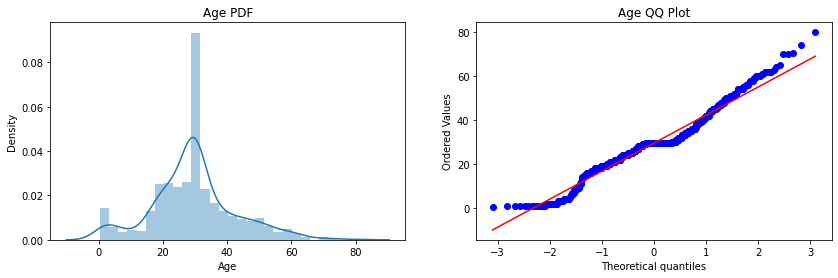

In [13]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age QQ Plot')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


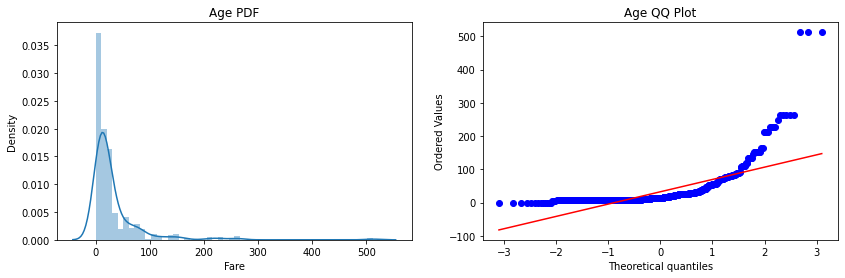

In [14]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title("Age QQ Plot")

plt.show()


In [15]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [16]:
clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
y_pred = clf.predict(X_test)
y_pred2 = clf2.predict(X_test)

In [18]:
print('Accuracy LR', accuracy_score(y_test, y_pred))
print('Accuracy DT', accuracy_score(y_test, y_pred2))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6759776536312849


In [19]:
trf = FunctionTransformer(func=np.log1p)

In [20]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [21]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [22]:
clf.fit(X_train_transformed, y_train)
clf2.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [23]:
y_pred = clf.predict(X_test_transformed)
y_pred2 = clf2.predict(X_test_transformed)

In [24]:
print('Accuracy LR', accuracy_score(y_test, y_pred))
print('Accuracy DT', accuracy_score(y_test, y_pred))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6815642458100558


# cross validation using cross_val_score


In [25]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print('LR', np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print('DT', np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6622222222222222


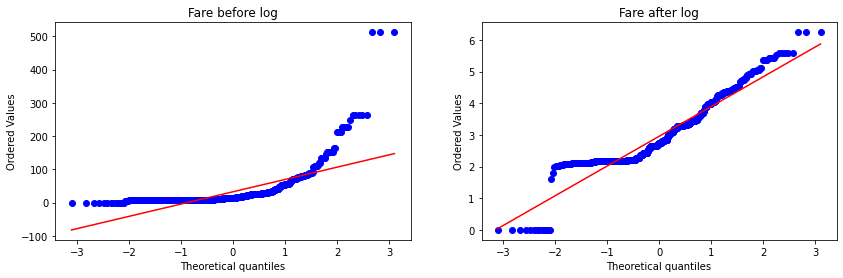

In [31]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title("Fare before log")

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist='norm', plot=plt)
plt.title('Fare after log')

plt.show()


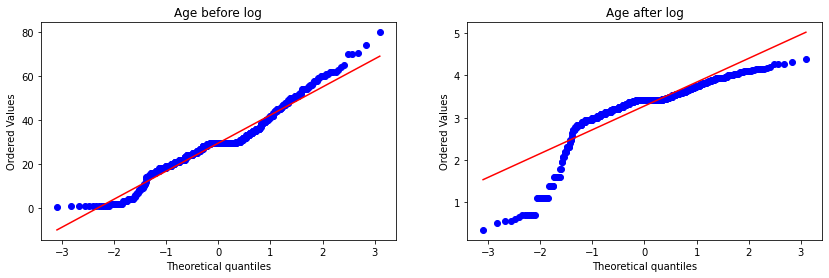

In [32]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age before log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist='norm', plot=plt)
plt.title('Age after log')

plt.show()

In [34]:
trf2 = ColumnTransformer([('log', FunctionTransformer(np.log1p), ['Fare'])], remainder='passthrough')

In [35]:
X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [36]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [38]:
clf.fit(X_train_transformed2, y_train)
clf2.fit(X_train_transformed2, y_train)

y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)

print('Accuracy LR', accuracy_score(y_test, y_pred))
print('Accuracy DT', accuracy_score(y_test, y_pred2))


Accuracy LR 0.6703910614525139
Accuracy DT 0.6759776536312849


# Checking with cross validation

In [39]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print('LR', np.mean(cross_val_score(clf, X_transformed2, y, scoring='accuracy', cv=10)))
print('DT', np.mean(cross_val_score(clf2, X_transformed2, y, scoring='accuracy', cv=10)))

LR 0.6712609238451936
DT 0.6622097378277153


# Creating a transformer function

In [40]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [42]:
def apply_transform(transform):
  X = df.iloc[:, 1:3]
  y = df.iloc[:, 0]

  trf = ColumnTransformer([('log', FunctionTransformer(transform), ['Fare'])], remainder= 'passthrough')

  X_trans = trf.fit_transform(X)

  clf = LogisticRegression()

  print('Accuracy', np.mean(cross_val_score(clf, X_trans, y, scoring='accuracy', cv=10)))

  plt.figure(figsize=(14,4))

  plt.subplot(121)
  stats.probplot(X['Fare'], dist='norm', plot=plt)
  plt.title('Fare before transform')

  plt.subplot(122)
  stats.probplot(X_trans[:,0], dist='norm', plot=plt)
  plt.title("Fare after transform")

  plt.show()






Accuracy 0.6712609238451936


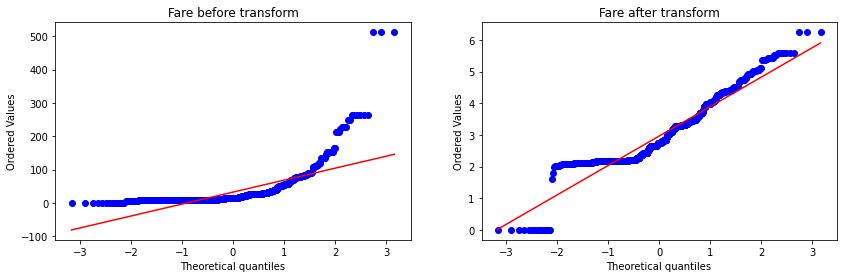

In [43]:
apply_transform(np.log1p)

Accuracy 0.6195131086142323


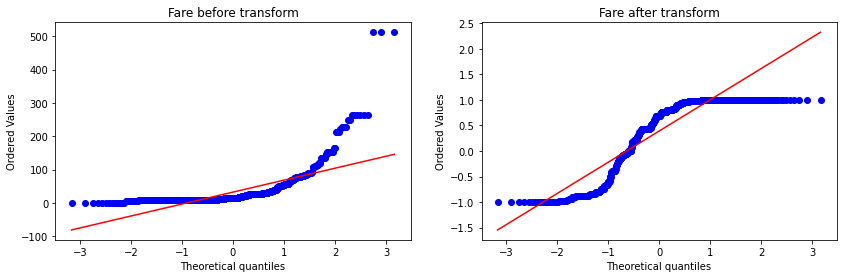

In [44]:
apply_transform(np.sin)